In [30]:
import pandas_geojson as pdg
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

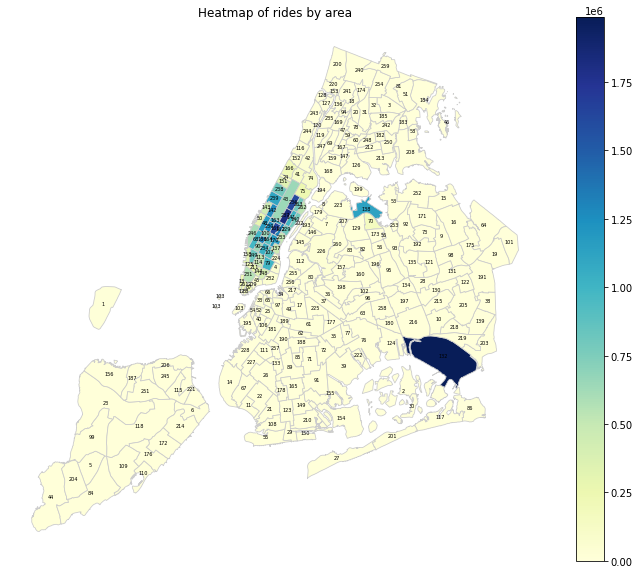

In [31]:
# Reload the GeoJSON data
taxi_zones_geojson_gdf = gpd.read_file("/Users/paddy/Documents/GitHub/Masterthesis_ML/raw/taxi_zones/taxi_zones.geojson")

# import parquet file
df = pd.read_parquet("/Users/paddy/Documents/GitHub/Masterthesis_ML/data/02_grouped_area_all_areas.parquet")

# # Converting 'location_id' in the GeoJSON data to integer for proper merging
# taxi_zones_geojson_gdf['location_id'] = taxi_zones_geojson_gdf['location_id'].astype(int)

# Merge the data based on PULocationID and LocationID
merged_geojson_gdf = taxi_zones_geojson_gdf.merge(df, left_on="LocationID", right_on="PULocationID")


# Plot the heatmap with legend formatted as decimals
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
merged_geojson_gdf.plot(column='counts', cmap='YlGnBu', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Adding annotations for LocationID
for idx, row in merged_geojson_gdf.iterrows():
    plt.annotate(text=row['LocationID'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 horizontalalignment='center', fontsize=5, color='black')

# Delete axis ticks and labels
ax.set_axis_off()

ax.set_title("Heatmap of rides by area")
plt.show()

# Save the figure
fig.savefig("/Users/paddy/Documents/GitHub/Masterthesis_ML/plots/heatmap_all_areas.png", dpi=300, bbox_inches='tight')
